#           CREDIT CARD FRAUD DETECTION ML AND DS PROJECT


# Data preprocessing

## Libraries Import

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

## Data Import

In [5]:
df=pd.read_csv("C:\datascience\creditcard_2023.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vini2\AppData\Local\Temp\ipykernel_20732\813419995.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("C:\datascience\creditcard_2023.csv")


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


## EDA Exploratory Data Analysis

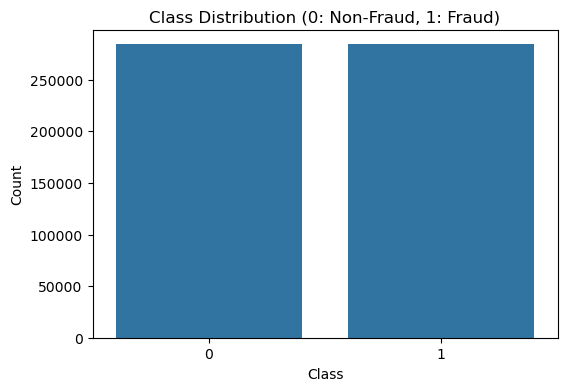

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### This shows the number of fraud cases (1) versus non-fraud cases (0). If there are many more non-fraud cases than fraud cases, it means we have an imbalanced dataset, which could make it harder to detect fraud.

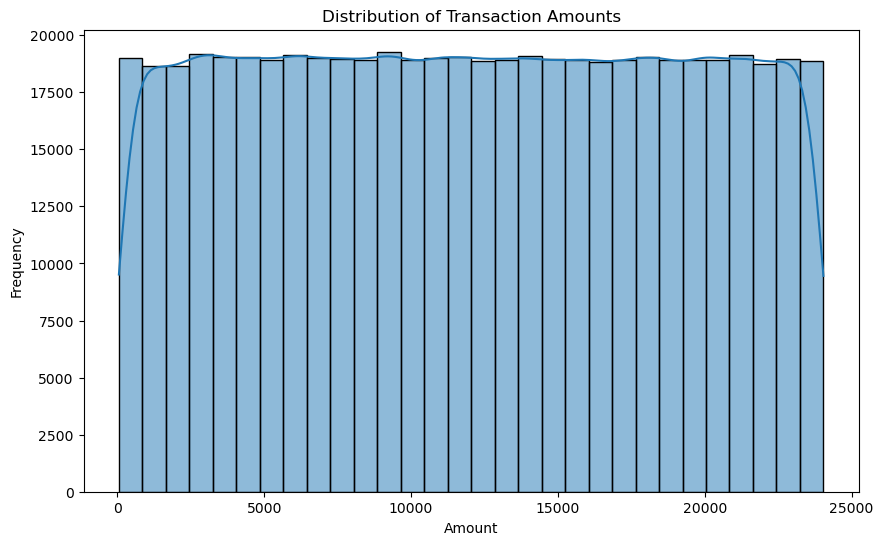

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


#### This plot shows how often different transaction amounts appear. Most transactions are likely small, but we can see if there are any larger, unusual amounts. This helps identify typical vs. unusual transaction sizes.

## Feature Engineering

In [12]:
pd.options.display.max_columns=None

In [13]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [14]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,0.892136,-1.153011,0.489197,-1.062488,0.207773,-0.917240,-0.936114,-0.823688,-0.330408,-0.621378,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


### pd.options.display.max_columns = None was used to ensure that all columns in the DataFrame are visible when viewing or printing the data. This setting prevents pandas from truncating the output, allowing for a complete and unobstructed view of the dataset. By displaying all columns, it becomes easier to analyze and inspect the data thoroughly, ensuring no information is overlooked during the exploration and preparation stages of the project.

In [15]:
df.shape

(568630, 31)

In [16]:
print("number of columns:{}".format(df.shape[1]))
print("number of rows:{}".format(df.shape[0]))

number of columns:31
number of rows:568630


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [18]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [22]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


### In this credit card fraud detection project, `StandardScaler` was used to standardize the `'Amount'` feature to improve model performance. This ensures that the feature has a mean of 0 and a standard deviation of 1, making it easier for machine learning models to interpret and learn from the data. The analysis shows that standardization helps prevent the model from being biased toward features with larger values, like the transaction amount, leading to more accurate and efficient fraud detection.

In [23]:
df.duplicated().any()

False

In [24]:
df=df.drop_duplicates()

In [25]:
df.shape

(568630, 31)

In [26]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## Data Visualization

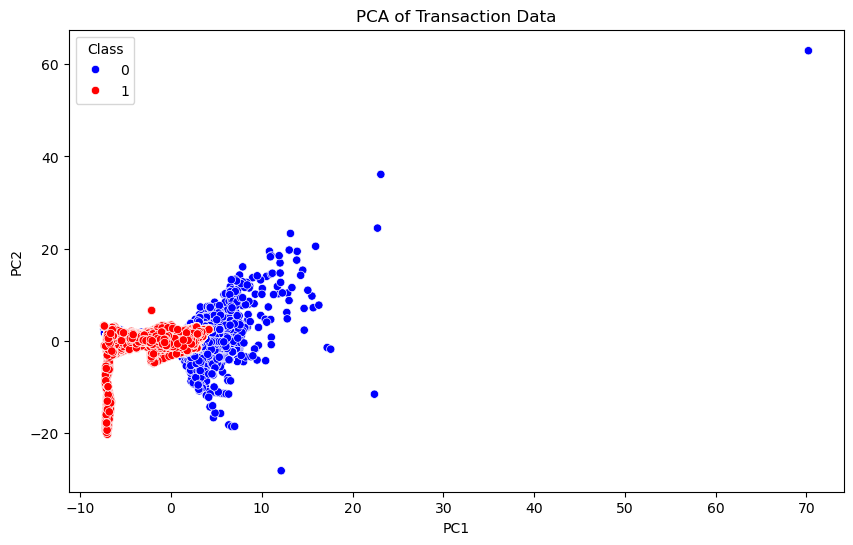

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(['id', 'Class'], axis=1))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Class'] = df['Class']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette=['blue', 'red'])
plt.title('PCA of Transaction Data')
plt.show()


#### This plot reduces the data to two main components (PC1 and PC2) and colors points as fraud or non-fraud. It helps us see if fraud and non-fraud transactions form distinct clusters, which could make it easier for a model to separate them.

# Model Building

## Train-test-Split 

In [32]:
X=df.drop('Class',axis=1)
y=df['Class']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

## Model Initialization

In [152]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

for name, clf in classifiers.items():
    print(f"\n============== {name} ===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")



============== Logistic Regression ===========


C:\Users\vini2\OneDrive\Desktop\anaconda_20\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.9965531188998118
Precision: 0.9971707728534777
Recall: 0.9959456613310868
F1 Score: 0.99655784057182

============== Decision Tree Classifier ===========

Accuracy: 0.9995603467984454
Precision: 0.9994560258299993
Recall: 0.9996665262566695
F1 Score: 0.9995612649608648

============== k-Nearest Neighbors ===========

Accuracy: 0.9992350034292949
Precision: 1.0
Recall: 0.9984730412805392
F1 Score: 0.9992359372941642

============== XGBoost Classifier ===========

Accuracy: 0.999815345655347
Precision: 0.9998946758649745
Recall: 0.9997367312552654
F1 Score: 0.9998156973223454


In [38]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [39]:
normal.shape

(284315, 31)

In [40]:
fraud.shape

(284315, 31)

In [41]:
dtc= DecisionTreeClassifier()

In [42]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

#### DecisionTreeClassifier()->model1

In [43]:
import joblib

In [44]:
joblib.dump(dtc,"credit_card_model.pk1")

['credit_card_model.pk1']

In [45]:
model=joblib.load("credit_card_model.pk1")

In [49]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,-1.105231,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,-1.067766,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1.666401,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,-0.271853,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,0.892136,-1.153011,0.489197,-1.062488,0.207773,-0.917240,-0.936114,-0.823688,-0.330408,-0.621378,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,1.365962,1


In [51]:
model2=LogisticRegression()

In [52]:
model2.fit(X_train,y_train)

C:\Users\vini2\OneDrive\Desktop\anaconda_20\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### LogisticRegression()->model2

In [53]:
model2.score(X_test,y_test)

0.9965531188998118

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

#### KNeighborsClassifier->model3

In [57]:
knn.score(X_test,y_test)

0.9992174173012328

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[56750,     0],
       [   89, 56887]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

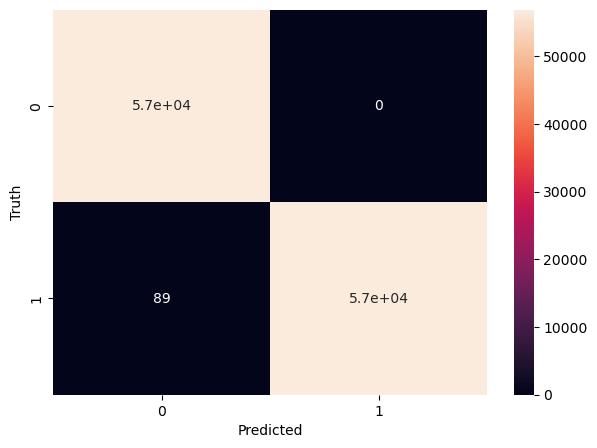

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
xgboost_model = XGBClassifier()


In [150]:
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

####  XGBClassifier->model4

# Evaluation and Result

In [154]:
model.predict([[0	,-0.260648	,-0.469648,	2.496266,	-0.083724,	0.129681	,0.732898,	0.519014	,-0.130006,	0.727159,	0.637735,	-0.987020	,0.293438	,-0.941386,	0.549020,	1.804879,	0.215598	,0.512307,	0.333644,	0.124270,	0.091202,	-0.110552,	0.217606,	-0.134794,	0.165959,	0.126280,	-0.434824,	-0.081230,	-0.151045,	0.858447]])

C:\Users\vini2\OneDrive\Desktop\anaconda_20\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### array([0], dtype=int64) its not a fraud transaction

In [165]:
model2.predict([[568625, -0.833437, 0.061886, -0.899794, 0.904227, -1.002401, 0.481454, -0.370393, 0.189694, -0.938153, -1.161847, 1.430971, -1.330500, -1.580730, -1.363454, 0.287766, -1.480796, -1.520928, -1.376970, 1.789103, -0.751011, 0.167503, 0.419731, 1.288249, -0.900861, 0.560661, -0.006018, 3.308968, 0.081564, -1.105231
               ]])

C:\Users\vini2\OneDrive\Desktop\anaconda_20\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### array([1], dtype=int64) depicts fraud transaction

In [167]:
xgboost_model.predict([[568625, -0.833437, 0.061886, -0.899794, 0.904227, -1.002401, 0.481454, -0.370393, 0.189694, -0.938153, -1.161847, 1.430971, -1.330500, -1.580730, -1.363454, 0.287766, -1.480796, -1.520928, -1.376970, 1.789103, -0.751011, 0.167503, 0.419731, 1.288249, -0.900861, 0.560661, -0.006018, 3.308968, 0.081564, -1.105231
               ]])

array([1])

In [169]:
knn.predict([[0	,-0.260648	,-0.469648,	2.496266,	-0.083724,	0.129681	,0.732898,	0.519014	,-0.130006,	0.727159,	0.637735,	-0.987020	,0.293438	,-0.941386,	0.549020,	1.804879,	0.215598	,0.512307,	0.333644,	0.124270,	0.091202,	-0.110552,	0.217606,	-0.134794,	0.165959,	0.126280,	-0.434824,	-0.081230,	-0.151045,	0.858447]])

C:\Users\vini2\OneDrive\Desktop\anaconda_20\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Model performance 

### XGBoost stands out as the best overall model, achieving the highest accuracy, precision, and F1 score. Its performance makes it the most reliable choice when precision and recall are both crucial.
### Decision Tree excels in recall, ensuring it doesn’t miss many positive cases, but it slightly underperforms in precision compared to kNN and XGBoost.
### kNN is exceptional in precision, which is useful for cases where false positives are critical, but its slightly lower recall makes it less effective at identifying all positive cases.
### Logistic Regression, while effective, is outperformed by the other models in terms of precision and recall, making it less ideal for high-stakes classification tasks.

### Based on this analysis, XGBoost would be the preferred model due to its exceptional performance across all metrics, closely followed by the Decision Tree for its strong recall capabilities. kNN is ideal when minimizing false positives is key, and Logistic Regression, while decent, is better suited for simpler tasks or when model simplicity is prioritized over performance.